In [41]:
import cv2
#https://scikit-learn.org/stable/modules/model_persistence.html
from joblib import dump, load
from skimage.feature import hog
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
IMAGE = "322.png"
MODEL = "./bkp/digits3_svm.pkl"
clf = load(MODEL) 

# 85 (290, 288, 3)

(280, 286, 3)


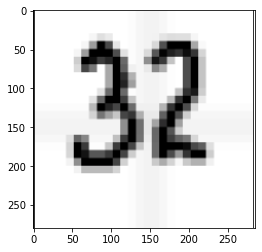

In [43]:
input_image = cv2.imread(IMAGE)
print(input_image.shape)
# input_image = cv2.resize(input_image, (600, 600), interpolation=cv2.INTER_AREA)
# print(input_image.shape)
plt.imshow(input_image)
plt.show()

In [44]:
import numpy as np
import argparse
import imutils
import cv2
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

(280, 286, 3)


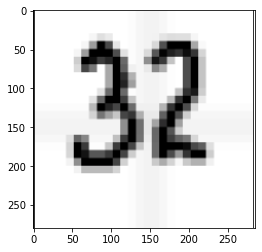

((0, 0, 1, 280), (52, 40, 81, 160), (152, 40, 70, 150))


In [45]:
input_image = cv2.imread(IMAGE)
print(input_image.shape)
#im = cv2.resize(im, (600, 600), interpolation=cv2.INTER_AREA)
#print(im.shape)
plt.imshow(input_image)
plt.show()

# Convert to grayscale and Gaussian filtering
input_image_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_gray = cv2.GaussianBlur(input_image_gray, (5, 5), 0)
# Threshold the image
ret, processed_image = cv2.threshold(input_image_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
contours, hier = cv2.findContours(processed_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

(ctrs, boundingBoxes) = sort_contours(contours)
# Get rectangles contains each contour
#boundingBoxes = [cv2.boundingRect(ctr) for ctr in ctrs]
print(boundingBoxes)

In [46]:
len(boundingBoxes)

3

pt1= 48
pt2= 20
leng= 144


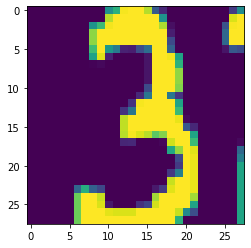

(28, 28)
pt1= 48
pt2= 120
leng= 135


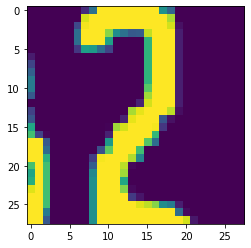

(28, 28)


In [47]:
for rect in boundingBoxes:
    if rect[2] <=10:
        continue
    # Draw the rectangles
    ## cv2.rectangle(image, start_point, end_point, color, thickness) 
    ## Axis: X axis and Y axis is inverted 
    ## x = rect[0] 
    ## y = rect[1]
    ## deltax = rect[2]
    ## deltay = rect[3]
    pimage = cv2.rectangle(input_image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
#     print(pimage.shape)
#     plt.imshow(pimage)
#     plt.show()
    leng = int(rect[3] * 0.9)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    print("pt1=", pt1)
    print("pt2=", pt2)
    print("leng=", leng)
    roi = processed_image[pt1:pt1+leng, pt2:pt2+leng]
#     plt.imshow(roi)
#     plt.show()
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
#     plt.imshow(roi)
#     plt.show()
    roi = cv2.dilate(roi, (3, 3))
    plt.imshow(roi)
    plt.show()
    print(roi.shape)
    #predicted = classifier.predict(roi)
    #print(predicted)

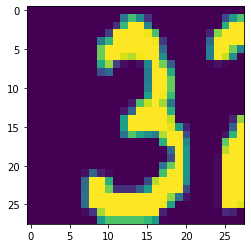

(28, 28)
3


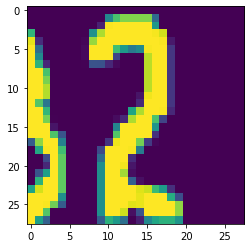

(28, 28)
2


In [48]:
final_num = ""
for rect in boundingBoxes:
    if rect[2] <=10:
        continue
    # Draw the rectangles
    pimage = cv2.rectangle(input_image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.1)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = processed_image[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    plt.imshow(roi)
    plt.show()
    print(roi.shape)
    # Calculate the HOG features
    #roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1))
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2))
    #print(roi_hog_fd.shape)
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    final_num+=str(nbr[0])
    print(nbr[0])
    cv2.putText(input_image, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

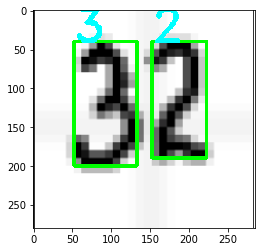

32


In [49]:
plt.imshow(input_image)
plt.show()
print(final_num)